# Quantization Fundamens

## Data types and sizes

In [1]:
import torch

### Integers

In [2]:
# torch.int8
torch.iinfo(torch.int8)

iinfo(min=-128, max=127, dtype=int8)

In [3]:
# torch.uint8
torch.iinfo(torch.uint8)

iinfo(min=0, max=255, dtype=uint8)

In [4]:
torch.iinfo(torch.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [5]:
torch.iinfo(torch.int32)

iinfo(min=-2.14748e+09, max=2.14748e+09, dtype=int32)

In [6]:
torch.iinfo(torch.int64)

iinfo(min=-9.22337e+18, max=9.22337e+18, dtype=int64)

### Floating points

In [7]:
value = 1 / 3
value

0.3333333333333333

In [8]:
format(value, '.60f')

'0.333333333333333314829616256247390992939472198486328125000000'

In [9]:
tensor_fp64 = torch.tensor(value, dtype=torch.float64)

In [10]:
print(f"fp64 tesnor: {format(tensor_fp64.item(), '.60f')}")

fp64 tesnor: 0.333333333333333314829616256247390992939472198486328125000000


In [11]:
tensor_fp32 = torch.tensor(value, dtype=torch.float32)
tensor_fp16 = torch.tensor(value, dtype=torch.float16)
tensor_bfp16 = torch.tensor(value, dtype=torch.bfloat16)

In [12]:
print(f"fp64 tesnor: {format(tensor_fp64.item(), '.60f')}")
print(f"fp32 tesnor: {format(tensor_fp32.item(), '.60f')}")
print(f"fp16 tesnor: {format(tensor_fp16.item(), '.60f')}")
print(f"bfp16 tesnor: {format(tensor_bfp16.item(), '.60f')}")

fp64 tesnor: 0.333333333333333314829616256247390992939472198486328125000000
fp32 tesnor: 0.333333343267440795898437500000000000000000000000000000000000
fp16 tesnor: 0.333251953125000000000000000000000000000000000000000000000000
bfp16 tesnor: 0.333984375000000000000000000000000000000000000000000000000000


In [13]:
torch.finfo(torch.bfloat16)

finfo(resolution=0.01, min=-3.38953e+38, max=3.38953e+38, eps=0.0078125, smallest_normal=1.17549e-38, tiny=1.17549e-38, dtype=bfloat16)

In [14]:
torch.finfo(torch.float16)

finfo(resolution=0.001, min=-65504, max=65504, eps=0.000976562, smallest_normal=6.10352e-05, tiny=6.10352e-05, dtype=float16)

### Downcasting

In [15]:
tensor_fp32 = torch.rand(1000, dtype=torch.float32)

In [16]:
tensor_fp32[:5]

tensor([0.2002, 0.4513, 0.6274, 0.8921, 0.0566])

In [17]:
tensor_fp32_to_bfp16 = tensor_fp32.to(dtype=torch.bfloat16)

In [18]:
tensor_fp32_to_bfp16[:5]

tensor([0.2002, 0.4512, 0.6289, 0.8906, 0.0566], dtype=torch.bfloat16)

In [19]:
m_float_32 = torch.dot(tensor_fp32, tensor_fp32)

In [20]:
m_float_32

tensor(333.0701)

In [21]:
m_bfloat_16 = torch.dot(tensor_fp32_to_bfp16, tensor_fp32_to_bfp16)

In [22]:
m_bfloat_16

tensor(334., dtype=torch.bfloat16)

## Loading models in different data types

In [23]:
import torch
from torch import nn

class DummyModel(nn.Module):
    """
    A dummy model that consists of an embedding layer
    with two blocks of a linear layer followed by a layer
    norm layer.
    """
    def __init__(self):
        super().__init__()

        torch.manual_seed(123)

        self.token_embedding = nn.Embedding(2, 2)

        # Block 1
        self.linear_1 = nn.Linear(2, 2)
        self.layernorm_1 = nn.LayerNorm(2)

        # Block 2
        self.linear_2 = nn.Linear(2, 2)
        self.layernorm_2 = nn.LayerNorm(2)

        self.head = nn.Linear(2, 2)

    def forward(self, x):
        hidden_states = self.token_embedding(x)

        # Block 1
        hidden_states = self.linear_1(hidden_states)
        hidden_states = self.layernorm_1(hidden_states)

        # Block 2
        hidden_states = self.linear_2(hidden_states)
        hidden_states = self.layernorm_2(hidden_states)

        logits = self.head(hidden_states)
        return logits

In [24]:
model = DummyModel()

In [25]:
model

DummyModel(
  (token_embedding): Embedding(2, 2)
  (linear_1): Linear(in_features=2, out_features=2, bias=True)
  (layernorm_1): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
  (linear_2): Linear(in_features=2, out_features=2, bias=True)
  (layernorm_2): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
  (head): Linear(in_features=2, out_features=2, bias=True)
)

In [26]:
def print_param_dtype(model):
    for name, param in model.named_parameters():
        print(f"{name} is loaded in {param.dtype}")

In [27]:
print_param_dtype(model)

token_embedding.weight is loaded in torch.float32
linear_1.weight is loaded in torch.float32
linear_1.bias is loaded in torch.float32
layernorm_1.weight is loaded in torch.float32
layernorm_1.bias is loaded in torch.float32
linear_2.weight is loaded in torch.float32
linear_2.bias is loaded in torch.float32
layernorm_2.weight is loaded in torch.float32
layernorm_2.bias is loaded in torch.float32
head.weight is loaded in torch.float32
head.bias is loaded in torch.float32


### Casting model to `float16`

In [28]:
model_fp16 = DummyModel().half()
# model_fp16 = DummyModel().to(target_dtype)
# model_fp16 = DummyModel().bfloat16()

In [29]:
print_param_dtype(model_fp16)

token_embedding.weight is loaded in torch.float16
linear_1.weight is loaded in torch.float16
linear_1.bias is loaded in torch.float16
layernorm_1.weight is loaded in torch.float16
layernorm_1.bias is loaded in torch.float16
linear_2.weight is loaded in torch.float16
linear_2.bias is loaded in torch.float16
layernorm_2.weight is loaded in torch.float16
layernorm_2.bias is loaded in torch.float16
head.weight is loaded in torch.float16
head.bias is loaded in torch.float16


In [30]:
model_fp16

DummyModel(
  (token_embedding): Embedding(2, 2)
  (linear_1): Linear(in_features=2, out_features=2, bias=True)
  (layernorm_1): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
  (linear_2): Linear(in_features=2, out_features=2, bias=True)
  (layernorm_2): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
  (head): Linear(in_features=2, out_features=2, bias=True)
)

In [31]:
dummy_input = torch.LongTensor([[1, 0], [0, 1]])

In [32]:
logits_fp32 = model(dummy_input)

In [33]:
logits_fp32

tensor([[[-0.6872,  0.7132],
         [-0.6872,  0.7132]],

        [[-0.6872,  0.7132],
         [-0.6872,  0.7132]]], grad_fn=<ViewBackward0>)

In [34]:
try:
    logits_fp16 = model_fp16(dummy_input)
except Exception as error:
    print(f"{type(error)}: {error}")

In [35]:
logits_fp16

tensor([[[-0.6870,  0.7134],
         [-0.6870,  0.7134]],

        [[-0.6870,  0.7134],
         [-0.6870,  0.7134]]], dtype=torch.float16, grad_fn=<ViewBackward0>)

### Casting model to `bfloat16`

In [36]:
from copy import deepcopy

model_bf16 = deepcopy(model)
model_bf16 = model_bf16.to(torch.bfloat16)

In [37]:
print_param_dtype(model_bf16)

token_embedding.weight is loaded in torch.bfloat16
linear_1.weight is loaded in torch.bfloat16
linear_1.bias is loaded in torch.bfloat16
layernorm_1.weight is loaded in torch.bfloat16
layernorm_1.bias is loaded in torch.bfloat16
linear_2.weight is loaded in torch.bfloat16
linear_2.bias is loaded in torch.bfloat16
layernorm_2.weight is loaded in torch.bfloat16
layernorm_2.bias is loaded in torch.bfloat16
head.weight is loaded in torch.bfloat16
head.bias is loaded in torch.bfloat16


In [38]:
logits_bf16 = model_bf16(dummy_input)

In [39]:
logits_bf16

tensor([[[-0.6875,  0.7148],
         [-0.6875,  0.7148]],

        [[-0.6875,  0.7148],
         [-0.6875,  0.7148]]], dtype=torch.bfloat16, grad_fn=<ViewBackward0>)

In [40]:
mean_diff = torch.abs(logits_bf16 - logits_fp32).mean().item()
max_diff = torch.abs(logits_bf16 - logits_fp32).max().item()

print(f"Mean diff: {mean_diff} | Max diff: {max_diff}")

Mean diff: 0.000997886061668396 | Max diff: 0.0016907453536987305


### Change data types in generative models

In [41]:
from transformers import BlipForConditionalGeneration

/Users/mchojna/Documents/GitHub/llm-playground/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
model_name = "../models/blip-image-captioning-base"

In [43]:
model = BlipForConditionalGeneration.from_pretrained(model_name)

In [45]:
print_param_dtype(model)

vision_model.embeddings.class_embedding is loaded in torch.float32
vision_model.embeddings.position_embedding is loaded in torch.float32
vision_model.embeddings.patch_embedding.weight is loaded in torch.float32
vision_model.embeddings.patch_embedding.bias is loaded in torch.float32
vision_model.encoder.layers.0.self_attn.qkv.weight is loaded in torch.float32
vision_model.encoder.layers.0.self_attn.qkv.bias is loaded in torch.float32
vision_model.encoder.layers.0.self_attn.projection.weight is loaded in torch.float32
vision_model.encoder.layers.0.self_attn.projection.bias is loaded in torch.float32
vision_model.encoder.layers.0.layer_norm1.weight is loaded in torch.float32
vision_model.encoder.layers.0.layer_norm1.bias is loaded in torch.float32
vision_model.encoder.layers.0.mlp.fc1.weight is loaded in torch.float32
vision_model.encoder.layers.0.mlp.fc1.bias is loaded in torch.float32
vision_model.encoder.layers.0.mlp.fc2.weight is loaded in torch.float32
vision_model.encoder.layers.0.m

In [46]:
fp32_mem_footprint = model.get_memory_footprint()

In [47]:
print(f"Footprint of the fp32 model in bytes: {fp32_mem_footprint}")
print(f"Footprint of the fp32 model in MBs: {fp32_mem_footprint/1e+6}")

Footprint of the fp32 model in bytes: 989660400
Footprint of the fp32 model in MBs: 989.6604


In [49]:
model_bf16 = BlipForConditionalGeneration.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
)

In [50]:
bf16_mem_footprint = model_bf16.get_memory_footprint()

In [51]:
# Get the relative difference
relative_diff = bf16_mem_footprint / fp32_mem_footprint

print(f"Footprint of the bf16 model in MBs: {bf16_mem_footprint/1e+6}")
print(f"Relative diff: {relative_diff}")

Footprint of the bf16 model in MBs: 494.832248
Relative diff: 0.5000020693967345


### Model performance with `float32` and `bfloat16`

In [52]:
from transformers import BlipProcessor

In [54]:
processor = BlipProcessor.from_pretrained(
    model_name,
    use_fast=True
)

In [61]:
import requests
from PIL import Image

def load_image(img_url):
    image = Image.open(requests.get(
        img_url, stream=True).raw).convert('RGB')

    return image

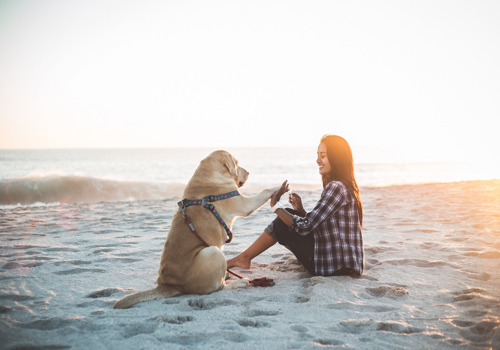

In [62]:
from IPython.display import display

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'

image = load_image(img_url)
display(image.resize((500, 350)))

In [63]:
def get_generation(model, processor, image, dtype):
    inputs = processor(image, return_tensors="pt").to(dtype)
    out = model.generate(**inputs)
    return processor.decode(out[0], skip_special_tokens=True)

In [64]:
results_fp32 = get_generation(
    model, 
    processor, 
    image, 
    torch.float32
)

`cache.key_cache[idx]` is deprecated and will be removed in v4.56.0. Use `cache.layers[idx].keys` instead.
`cache.value_cache[idx]` is deprecated and will be removed in v4.56.0. Use `cache.layers[idx].values` instead.


In [65]:
print(f"fp32 Model Results: {results_fp32}")

fp32 Model Results: a woman sitting on the beach with her dog


In [66]:
results_bf16 = get_generation(
    model_bf16, 
    processor, 
    image, 
    torch.bfloat16
)

In [67]:
print(f"bf16 Model Results: {results_bf16}")

bf16 Model Results: a woman sitting on the beach with a dog


### Default data types

In [77]:
torch.set_default_dtype(torch.bfloat16)

In [78]:
dummy_model_bf16 = DummyModel()

In [79]:
print_param_dtype(dummy_model_bf16)

token_embedding.weight is loaded in torch.bfloat16
linear_1.weight is loaded in torch.bfloat16
linear_1.bias is loaded in torch.bfloat16
layernorm_1.weight is loaded in torch.bfloat16
layernorm_1.bias is loaded in torch.bfloat16
linear_2.weight is loaded in torch.bfloat16
linear_2.bias is loaded in torch.bfloat16
layernorm_2.weight is loaded in torch.bfloat16
layernorm_2.bias is loaded in torch.bfloat16
head.weight is loaded in torch.bfloat16
head.bias is loaded in torch.bfloat16


In [80]:
torch.set_default_dtype(torch.float32)

In [81]:
dummy_model_f32 = DummyModel()

In [82]:
print_param_dtype(dummy_model_f32)

token_embedding.weight is loaded in torch.float32
linear_1.weight is loaded in torch.float32
linear_1.bias is loaded in torch.float32
layernorm_1.weight is loaded in torch.float32
layernorm_1.bias is loaded in torch.float32
linear_2.weight is loaded in torch.float32
linear_2.bias is loaded in torch.float32
layernorm_2.weight is loaded in torch.float32
layernorm_2.bias is loaded in torch.float32
head.weight is loaded in torch.float32
head.bias is loaded in torch.float32
